PaddleOCR is an ultra-lightweight OCR system, with multilingual recognition, digit recognition, vertical text recognition, as well as long text recognition.  <br>
Released by Baidu in September 2020 <br>
Use Differential Binarizer at the backend


Advantages: <br>
a)	Very accurate for horizontal text. <br>
b)	Fast and efficient. <br>
c)	Multilingual <br>
d)	Long and vertical text recognition. <br>
e)	Cross platform <br>
f)	easy PIP installation 

https://github.com/PaddlePaddle/PaddleOCR

https://pypi.org/project/paddleocr/

In [1]:
from paddleocr import PaddleOCR
from paddleocr import draw_ocr
from PIL import Image
import time
import os
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\jainp\anaconda3\lib\site-packages\dask\compatibility.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  PY_VERSION = LooseVersion(".".join(map(str, sys.version_info[:3])))
C:\Users\jainp\anaconda3\lib\site-packages\skimage\segmentation\random_walker_segmentation.py:49: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(scipy.__version__) >= Version('1.1'):


In [5]:
# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `french`, `german`, `korean`, `japan` to switch the language model in order.
paddle_reader = PaddleOCR(use_angle_cls = True, lang='en')


[2022/10/01 00:14:59] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\jainp/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\jainp/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_

In [6]:
# Draw Boundation boxes

def draw_boxes(image_path, model):
    start_time = time.time()
    
    # For determining bounding boxes, i.e. text detection, use
    res = model.ocr(image_path, cls=False, rec=False)
    
    # For determining exact text, i.e. text recognition, use
    # res = model.ocr(image_path, det=False, rec=True)
    
    # For determining if the image contains text or not, i.e. just classification, use
    # res = model.ocr(image_path, det=False, rec=False, cls=True)
    
    image = Image.open(image_path).convert('RGB')
    boxes = [line for line in res]
    img_show = draw_ocr(image, boxes)
    try:
        img_show = Image.fromarray(img_show)
        end_time = time.time()
    except: 
        print("No text detected")
    return (img_show, res)

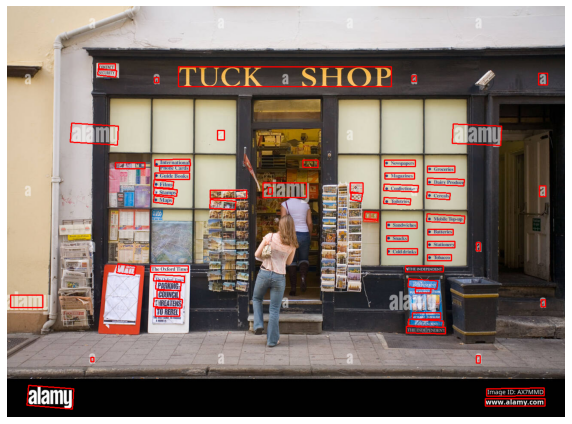

[[[1114.0, 913.0], [1253.0, 913.0], [1253.0, 930.0], [1114.0, 930.0]], [[50.0, 882.0], [155.0, 890.0], [152.0, 937.0], [46.0, 928.0]], [[1117.0, 890.0], [1251.0, 888.0], [1251.0, 906.0], [1117.0, 907.0]], [[195.0, 817.0], [202.0, 817.0], [202.0, 827.0], [195.0, 827.0]], [[1093.0, 813.0], [1102.0, 813.0], [1102.0, 830.0], [1093.0, 830.0]], [[930.0, 745.0], [1021.0, 747.0], [1021.0, 762.0], [930.0, 760.0]], [[935.0, 728.0], [1016.0, 732.0], [1015.0, 747.0], [934.0, 743.0]], [[944.0, 713.0], [1010.0, 713.0], [1010.0, 728.0], [944.0, 728.0]], [[345.0, 702.0], [402.0, 702.0], [402.0, 721.0], [345.0, 721.0]], [[342.0, 679.0], [408.0, 682.0], [407.0, 702.0], [341.0, 699.0]], [[1244.0, 683.0], [1254.0, 683.0], [1254.0, 699.0], [1244.0, 699.0]], [[8.0, 672.0], [83.0, 672.0], [83.0, 701.0], [8.0, 701.0]], [[349.0, 661.0], [402.0, 661.0], [402.0, 680.0], [349.0, 680.0]], [[951.0, 657.0], [987.0, 657.0], [987.0, 667.0], [951.0, 667.0]], [[347.0, 638.0], [405.0, 641.0], [404.0, 662.0], [346.0, 658.

In [7]:
output = draw_boxes('images/img1.jpg', paddle_reader)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(output[0])
plt.show()

print(output[1])

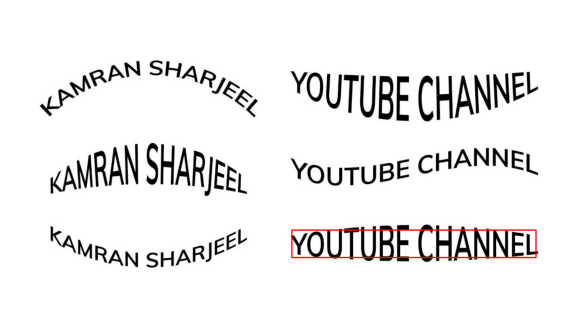

[[[653.0, 511.0], [1213.0, 511.0], [1213.0, 574.0], [653.0, 574.0]]]


In [8]:
output = draw_boxes('images/img2.jpg', paddle_reader)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(output[0])
plt.show()

print(output[1])

No text detected


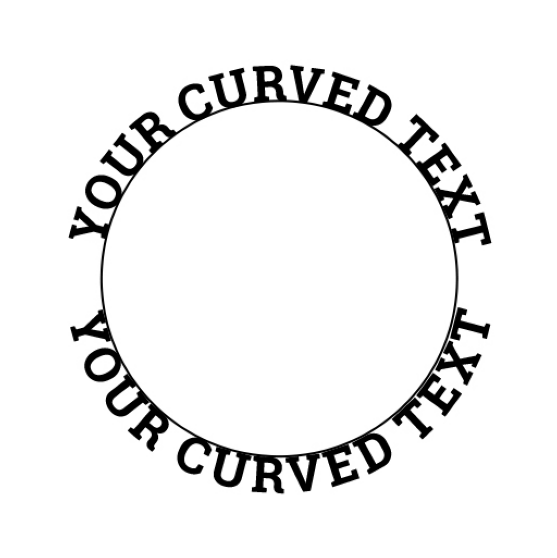

[]


In [9]:
output = draw_boxes('images/img3.jpg', paddle_reader)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(output[0])
plt.show()

print(output[1])